In [ ]:
import pandas as pd
dataset=pd.read_csv('weatherAUS.csv').values
print(dataset.shape)
dataset

(145460, 23)


array([['2008-12-01', 'Albury', 13.4, ..., 21.8, 'No', 'No'],
       ['2008-12-02', 'Albury', 7.4, ..., 24.3, 'No', 'No'],
       ['2008-12-03', 'Albury', 12.9, ..., 23.2, 'No', 'No'],
       ...,
       ['2017-06-23', 'Uluru', 5.4, ..., 26.1, 'No', 'No'],
       ['2017-06-24', 'Uluru', 7.8, ..., 26.0, 'No', 'No'],
       ['2017-06-25', 'Uluru', 14.9, ..., 20.9, 'No', nan]], dtype=object)

In [ ]:
import pandas as pd

dataset = dataset.dropna(subset=['Cloud3pm'])

# Select your features
data = dataset[['Rainfall','Humidity3pm','Cloud3pm','Pressure9am','MaxTemp','MinTemp']]
print(data.head())


AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

In [ ]:
import pandas as pd

# Load as pandas DataFrame
dataset = pd.read_csv('weatherAUS.csv')

# Remove rows where Cloud3pm is NaN
dataset = dataset.dropna(subset=['Cloud3pm'])

# Create TempDiff column
dataset['TempDiff'] = dataset['MaxTemp'] - dataset['MinTemp']

# Select features and target
data = dataset[['Rainfall','Humidity3pm','Cloud3pm','Pressure9am','TempDiff']].head(1500)
target = dataset['RainTomorrow'].head(1500)

print(data.shape)
print(target.shape)
print(data.head())
print(target.head())


(1500, 5)
(1500,)
    Rainfall  Humidity3pm  Cloud3pm  Pressure9am  TempDiff
2        0.0         30.0       2.0       1007.6      12.8
4        1.0         33.0       8.0       1010.8      14.8
11       2.2         91.0       8.0       1010.5       5.8
12      15.6         93.0       8.0        994.3       2.7
13       3.6         43.0       7.0       1001.2       8.4
2      No
4      No
11    Yes
12    Yes
13     No
Name: RainTomorrow, dtype: object


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

# Hidden Layer 1
model.add(Dense(16, input_dim=5, activation='relu'))

# Hidden Layer 2 (optional, small dataset, helps with slight nonlinearity)
model.add(Dense(8, activation='relu'))

# Optional dropout to prevent overfitting
model.add(Dropout(0.1))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

In [ ]:
print(train_data.shape)
print(test_data.shape)

(1200, 5)
(300, 5)


In [ ]:
print(data.isnull().sum())
print(target_numeric.isnull().sum())


Rainfall       14
Humidity3pm     0
Cloud3pm        0
Pressure9am     3
TempDiff        7
dtype: int64
12


In [ ]:
# Fill NaN values with column mean
data['Rainfall'] = data['Rainfall'].fillna(data['Rainfall'].mean())
data['Pressure9am'] = data['Pressure9am'].fillna(data['Pressure9am'].mean())
data['TempDiff'] = data['TempDiff'].fillna(data['TempDiff'].mean())

# Check again
print(data.isnull().sum())


Rainfall       0
Humidity3pm    0
Cloud3pm       0
Pressure9am    0
TempDiff       0
dtype: int64


In [ ]:
import numpy as np

print(np.isinf(data).sum())      # count of infinite values
print((data > 1e6).sum())        # count of extremely large values


Rainfall       0
Humidity3pm    0
Cloud3pm       0
Pressure9am    0
TempDiff       0
dtype: int64
Rainfall       0
Humidity3pm    0
Cloud3pm       0
Pressure9am    0
TempDiff       0
dtype: int64


In [ ]:
# Convert target to numeric
# Ensure target is numeric
target_numeric = target.head(1500).map({'No': 0, 'Yes': 1}).fillna(0)

# Split dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target_numeric, test_size=0.2, random_state=42)

# Now y_train and y_test are numeric (0/1)
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=200,
                    batch_size=16,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop])


Epoch 1/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6621 - loss: nan - val_accuracy: 0.6300 - val_loss: nan
Epoch 2/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6721 - loss: nan - val_accuracy: 0.6300 - val_loss: nan
Epoch 3/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6601 - loss: nan - val_accuracy: 0.6300 - val_loss: nan
Epoch 4/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6827 - loss: nan - val_accuracy: 0.6300 - val_loss: nan
Epoch 5/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6842 - loss: nan - val_accuracy: 0.6300 - val_loss: nan
Epoch 6/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6745 - loss: nan - val_accuracy: 0.6300 - val_loss: nan
Epoch 7/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6755 - loss: nan - val_accuracy: 0.6300 - val_loss: nan
Epoch 8/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6829 - loss: nan - val_accuracy: 0.6300 - val_loss: nan
Epoch 9/200
75/75 ━━━━━━━━━━━━━━

In [ ]:
# --------------------------
# Step 1: Load and clean data
# --------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset
dataset = pd.read_csv('weatherAUS.csv')

# Remove rows where Cloud3pm is NaN
dataset = dataset.dropna(subset=['Cloud3pm'])

# Create TempDiff column
dataset['TempDiff'] = dataset['MaxTemp'] - dataset['MinTemp']

# Select first 1500 rows and features
data = dataset[['Rainfall','Humidity3pm','Cloud3pm','Pressure9am','TempDiff']].head(1500)
target = dataset['RainTomorrow'].head(1500)

# Fill remaining NaNs in features with column mean
data['Rainfall'] = data['Rainfall'].fillna(data['Rainfall'].mean())
data['Pressure9am'] = data['Pressure9am'].fillna(data['Pressure9am'].mean())
data['TempDiff'] = data['TempDiff'].fillna(data['TempDiff'].mean())

# Check no NaNs or infinite values
assert data.isnull().sum().sum() == 0
assert np.isinf(data.values).sum() == 0

# Convert target to numeric 0/1
target_numeric = target.map({'No': 0, 'Yes': 1}).fillna(0)

# --------------------------
# Step 2: Train/test split
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(data, target_numeric, test_size=0.2, random_state=42)

# Ensure target is float
y_train = y_train.astype(float)
y_test = y_test.astype(float)

# --------------------------
# Step 3: Scale features
# --------------------------
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------
# Step 4: Build neural network
# --------------------------
model = Sequential()
model.add(Dense(16, input_dim=5, activation='relu'))   # Hidden Layer 1
model.add(Dense(8, activation='relu'))                 # Hidden Layer 2
model.add(Dropout(0.1))                                # Dropout to reduce overfitting
model.add(Dense(1, activation='sigmoid'))             # Output layer for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# --------------------------
# Step 5: Train the model
# --------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train,
                    epochs=200,
                    batch_size=16,
                    validation_data=(X_test_scaled, y_test),
                    callbacks=[early_stop])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6739 - loss: 0.6618 - val_accuracy: 0.6300 - val_loss: 0.6425
Epoch 2/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6758 - loss: 0.6129 - val_accuracy: 0.6333 - val_loss: 0.5919
Epoch 3/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6767 - loss: 0.5676 - val_accuracy: 0.7167 - val_loss: 0.5527
Epoch 4/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7296 - loss: 0.5364 - val_accuracy: 0.7433 - val_loss: 0.5370
Epoch 5/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7585 - loss: 0.5257 - val_accuracy: 0.7600 - val_loss: 0.5259
Epoch 6/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7791 - loss: 0.5162 - val_accuracy: 0.7667 - val_loss: 0.5173
Epoch 7/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7687 - loss: 0.5125 - val_accuracy: 0.7767 - val_loss: 0.5089
Epoch 8/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7700 - loss: 0.5096 - val_accuracy: 0.7700 - 

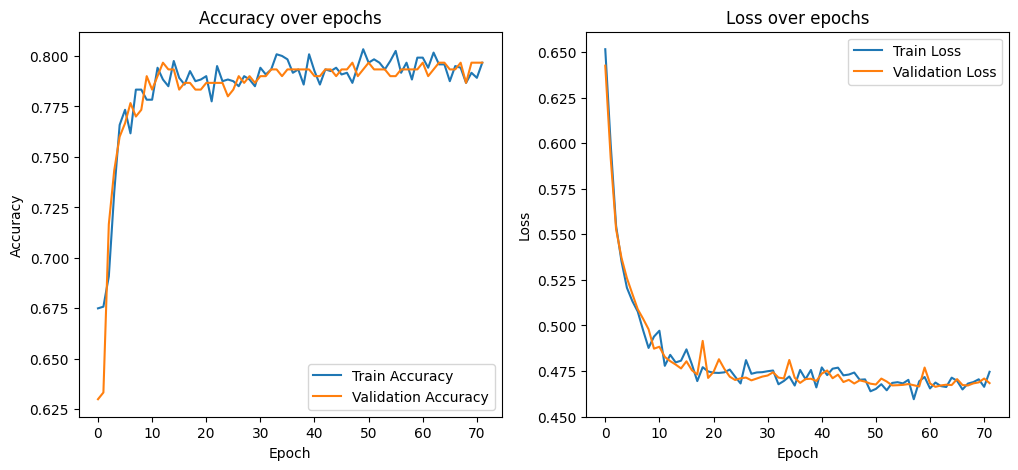

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
# Keras native format (recommended)
model.save('FFNN-RainTommorrow.keras')

# OR HDF5 format
model.save('FFNN-RainTommorrow.h5')


In [ ]:
import numpy as np
import pandas as pd

# Example: create random sample data in the same feature format
# Make sure features are in the same order: ['Rainfall','Humidity3pm','Cloud3pm','Pressure9am','TempDiff']

random_sample = pd.DataFrame({
    'Rainfall': [0.0, 5.2, 10.0],       # example rainfall values
    'Humidity3pm': [45, 78, 92],        # example humidity
    'Cloud3pm': [2, 7, 9],              # cloud coverage 0-9 scale
    'Pressure9am': [1012, 1008, 1005],  # pressure
    'TempDiff': [12, 5, 7]              # max temp - min temp
})

# Scale the random sample using the same scaler as training
random_scaled = scaler.transform(random_sample)

# Predict using the trained model
predictions = model.predict(random_scaled)

# Convert predictions to Yes/No
pred_labels = ['Yes' if p > 0.5 else 'No' for p in predictions]

# Show results
for i, pred in enumerate(pred_labels):
    print(f"Sample {i+1}: Rain Tomorrow? {pred}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Sample 1: Rain Tomorrow? No
Sample 2: Rain Tomorrow? Yes
Sample 3: Rain Tomorrow? Yes


In [ ]:
from google.colab import files
files.download("RainTomorrow in Australiya.ipynb")


FileNotFoundError: Cannot find file: RainTomorrow in Australiya.ipynb

In [ ]:
!pwd           # Shows current directory
!ls -lh        # Lists files in current directory


/content
total 14M
-rw-r--r-- 1 root root  36K Aug 24 09:42 FFNN-RainTommorrow.h5
-rw-r--r-- 1 root root  30K Aug 24 09:42 FFNN-RainTommorrow.keras
drwxr-xr-x 1 root root 4.0K Aug 21 13:41 sample_data
-rw-r--r-- 1 root root  14M Aug 24 08:56 weatherAUS.csv


In [49]:
from google.colab import drive
drive.mount('/content/drive')

# Copy the notebook to /content/
!cp "/content/drive/MyDrive/path_to_notebook/RainTomorrow in Australiya.ipynb" .


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cp: cannot stat '/content/drive/MyDrive/path_to_notebook/RainTomorrow in Australiya.ipynb': No such file or directory


In [ ]:
import shutil

shutil.rmtree('/content/sample_data')
